In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Breast_cancer_data.csv')


In [29]:
# Check the distribution of the target variable
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
1    357
0    212
Name: count, dtype: int64


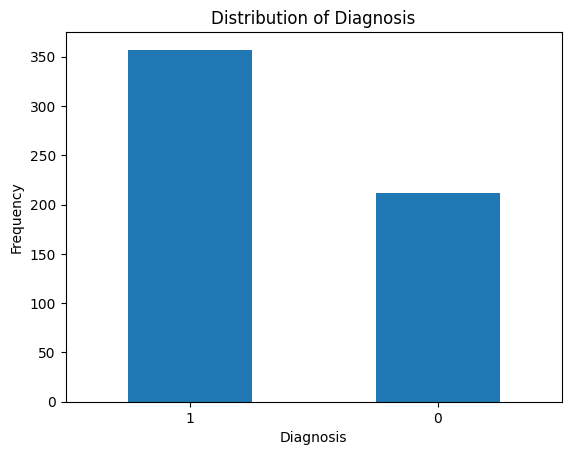

In [30]:
# Plot the distribution
import matplotlib.pyplot as plt

diagnosis_counts.plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

diagnosis
1    212
0    212
Name: count, dtype: int64


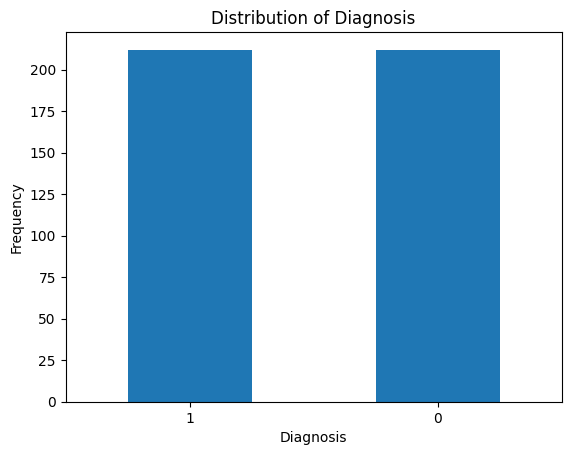

In [34]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['diagnosis'] == df['diagnosis'].value_counts().idxmax()]
df_minority = df[df['diagnosis'] == df['diagnosis'].value_counts().idxmin()]

# Undersample majority class
df_majority_undersampled = resample(df_majority, 
                                    replace=False,  # Sample without replacement
                                    n_samples=len(df_minority),  # Match number of minority class
                                    random_state=42)  # Reproducible results

# Combine majority class with undersampled minority class
df_balanced = pd.concat([df_majority_undersampled, df_minority])

# Display new class counts
print(df_balanced['diagnosis'].value_counts())

import matplotlib.pyplot as plt

df_balanced['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [4]:
print(df.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


In [4]:
print(df.tail())

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
564          0  
565          0  
566          0  
567          0  
568          1  


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB
None


In [7]:
# Display summary statistics
print(df.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


In [13]:
# Check for null values
null_values = df.isnull()
null = null_values.sum()
print(null)
# there is no null values in the data

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64


In [8]:
#encoding categorical data
#from sklearn.preprocessing import LabelEncoder

#label_encoder = LabelEncoder()
#df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

#df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [9]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(x , y , test_size=0.2, random_state=42)


In [11]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, -0.06142266, -2.26162674],
       [-0.03896885,  0.10207345, -0.03137406, -0.15477966,  0.73743174],
       [-0.54860557,  0.31327591, -0.60350155, -0.5518995 , -1.12268916]])

In [16]:
# Initialize and train the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.9473684210526315
Confusion Matrix:
[[41  2]
 [ 4 67]]


In [25]:
y_test , y_pred

(204    1
 70     0
 131    0
 431    1
 540    1
       ..
 486    1
 75     0
 249    1
 238    1
 265    0
 Name: diagnosis, Length: 114, dtype: int64,
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 0], dtype=int64))

In [22]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.9385964912280702
Confusion Matrix:
[[39  4]
 [ 3 68]]


In [28]:
single_row = df.drop('diagnosis', axis=1).iloc[0].values.reshape(1, -1)  # Example: using the first row

# Make predictions on the single row
single_row_prediction = model.predict(single_row)
if single_row_prediction == 0 :
    single_row_prediction = "negative"
else:
    single_row_prediction = "positive"
print(f'Prediction for the single row: {single_row_prediction}')

Prediction for the single row: negative
